In this notebook, we cover:

* [Visualizing Distributions](#Visualizing-Distributions)

Let us, as always, load up the `tidyverse` package.

# Visualizing Distributions

In [1]:
options(repr.plot.width=6, repr.plot.height=4)
library(tidyverse)

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats


Recall that a **categorical** variable is one that can only take one of a small set of values. Recall the `diamonds` data set.

In [2]:
print(diamonds)

# A tibble: 53,940 × 10
   carat       cut color clarity depth table price     x     y     z
   <dbl>     <ord> <ord>   <ord> <dbl> <dbl> <int> <dbl> <dbl> <dbl>
1   0.23     Ideal     E     SI2  61.5    55   326  3.95  3.98  2.43
2   0.21   Premium     E     SI1  59.8    61   326  3.89  3.84  2.31
3   0.23      Good     E     VS1  56.9    65   327  4.05  4.07  2.31
4   0.29   Premium     I     VS2  62.4    58   334  4.20  4.23  2.63
5   0.31      Good     J     SI2  63.3    58   335  4.34  4.35  2.75
6   0.24 Very Good     J    VVS2  62.8    57   336  3.94  3.96  2.48
7   0.24 Very Good     I    VVS1  62.3    57   336  3.95  3.98  2.47
8   0.26 Very Good     H     SI1  61.9    55   337  4.07  4.11  2.53
9   0.22      Fair     E     VS2  65.1    61   337  3.87  3.78  2.49
10  0.23 Very Good     H     VS1  59.4    61   338  4.00  4.05  2.39
# ... with 53,930 more rows


Here the variable **color** is categorical. Let us plot a bar chart to examine its distribution.

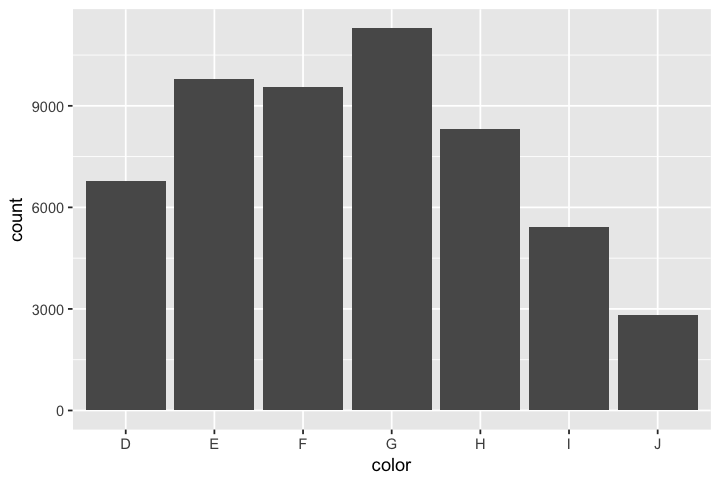

In [3]:
ggplot(data = diamonds) +
    geom_bar(mapping = aes(x = color))

These counts can be computed manually using the `count()` function in `dplyr`.

In [4]:
count(diamonds, color)

color,n
D,6775
E,9797
F,9542
G,11292
H,8304
I,5422
J,2808


We can get the same result but using a pipe.

In [5]:
diamonds %>%
    count(color)

color,n
D,6775
E,9797
F,9542
G,11292
H,8304
I,5422
J,2808


A **continuous** variable can take one of an infinite number of ordered values. Let us look at the **dep_delay** variables from the `flights` data set. Note that we are about to use a new ggplot geometry, namely **geom_histogram**. It can be used to visualize the distribution of a continuous variable.

Warning message:
“Removed 8255 rows containing non-finite values (stat_bin).”

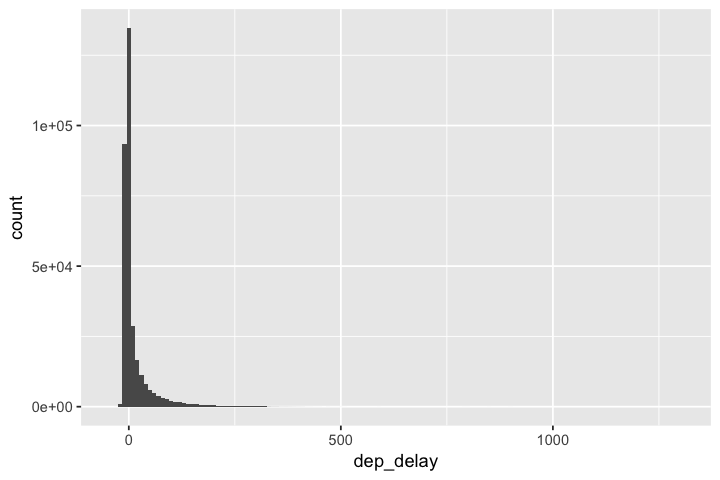

In [6]:
library(nycflights13)
ggplot(data = flights) +
    geom_histogram(mapping = aes(x = dep_delay), binwidth = 10)

Okay, so 8255 rows got ignored. Let us find out why.

In [7]:
flights %>%
    filter(is.na(dep_delay)) %>%
    count()

n
8255


So let us work with non-missing values only.

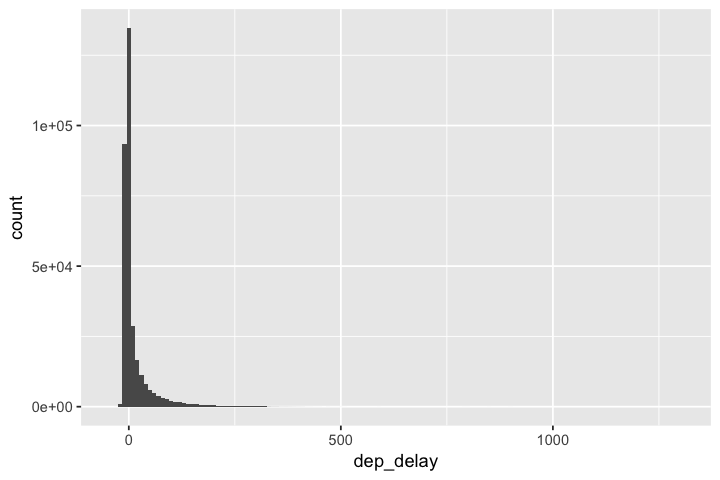

In [8]:
flights_nona <- filter(flights, !is.na(dep_delay))
ggplot(flights_nona) +
    geom_histogram(mapping = aes(x = dep_delay), binwidth = 10)

Let us zoom into the left part of the plot. Let us only look at flights with departure delays of less than an hour.

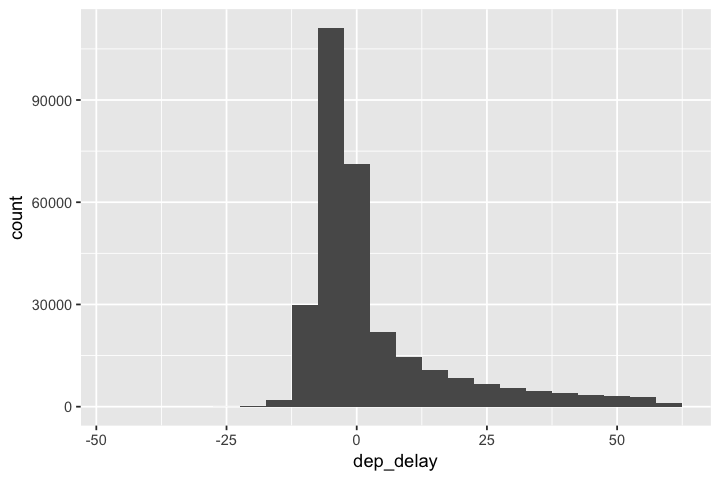

In [9]:
flights_nona %>%
    filter(dep_delay < 60) %>%
    ggplot() +
        geom_histogram(mapping = aes(x = dep_delay), binwidth = 5) # we choose a smaller bin width now

We can look at the underlying bins and their count by using the `cut_width` function in ggplot2.

In [10]:
flights_nona %>%
    filter(dep_delay < 60) %>%
    count(cut_width(dep_delay, 5))

"cut_width(dep_delay, 5)",n
"[-47.5,-42.5]",1
"(-37.5,-32.5]",1
"(-32.5,-27.5]",2
"(-27.5,-22.5]",14
"(-22.5,-17.5]",160
"(-17.5,-12.5]",2079
"(-12.5,-7.5]",29878
"(-7.5,-2.5]",111111
"(-2.5,2.5]",71126
"(2.5,7.5]",22013


The appearance of a histogram does depend on your choice of the bin width. It is a good idea to try several values to see if different choices reveal different patterns.

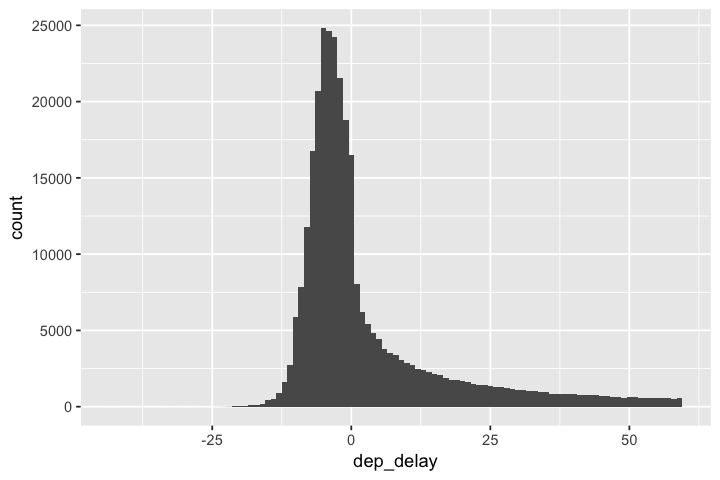

In [11]:
flights_nona %>%
    filter(dep_delay < 60) %>%
    ggplot() +
        geom_histogram(mapping = aes(x = dep_delay), binwidth = 1) # we choose an even smaller bin width now

Let us bring in the categorical variable **carrier** and map the color aesthetic to it.

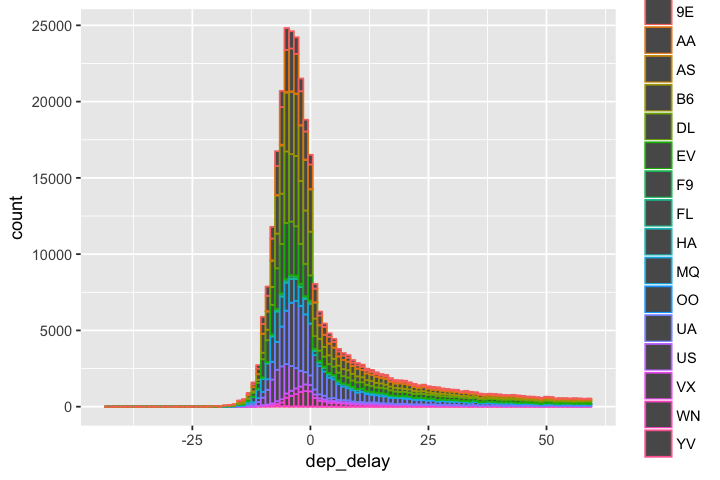

In [12]:
flights_nona %>%
    filter(dep_delay < 60) %>%
    ggplot() +
        geom_histogram(mapping = aes(x = dep_delay, color = carrier), binwidth = 1)

Oops! The legend is a bit crowded. Let us see who the major carriers are by number of flights.

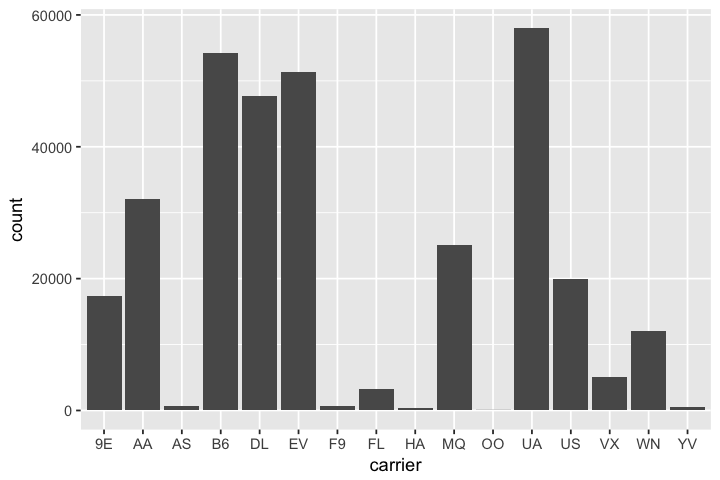

In [13]:
flights_nona %>%
    ggplot() +
        geom_bar(mapping = aes(x = carrier))

Visually, we see that the top 5 carriers by flight count are AA, B6, DL, EV and UA. But let us compute this using pipes.

In [14]:
(top5 <- flights_nona %>%
            group_by(carrier) %>%
            summarize(count = n()) %>%
            top_n(5, count) %>% # new function -- returns top 5 carriers but not sorted by count
            .[["carrier"]]) # new syntax -- extracts a column as an R vector

[1] "AA" "B6" "DL" "EV" "UA"

Now we can additional filter out rows that do not belong to the top 5 carriers.

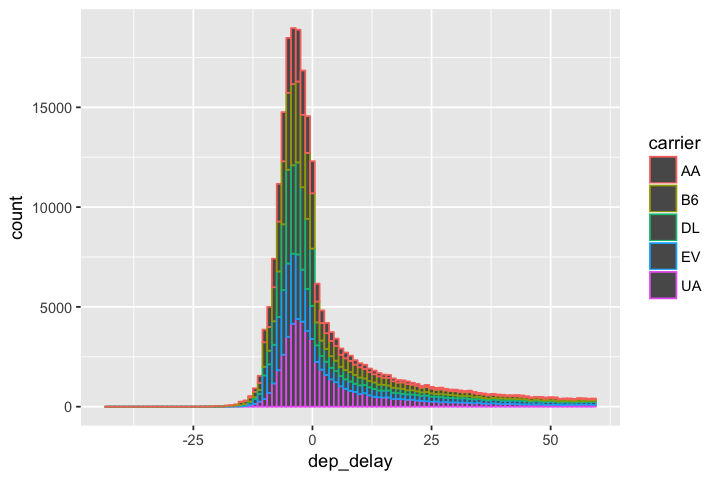

In [15]:
flights_nona %>%
    filter(dep_delay < 60, carrier %in% top5) %>%
    ggplot() +
        geom_histogram(mapping = aes(x = dep_delay, color = carrier), binwidth = 1)

Hmmm... May be not a good idea to stick with histograms here. Let us use a new geometry **freqpoly** which is like histogram but shows lines. Overlapping lines are easier to see than overlapping bars.

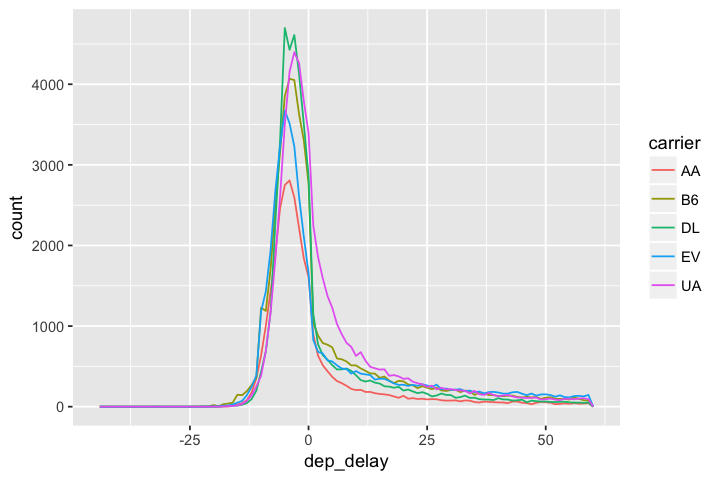

In [16]:
flights_nona %>%
    filter(dep_delay < 60, carrier %in% top5) %>%
    ggplot() +
        geom_freqpoly(mapping = aes(x = dep_delay, color = carrier), binwidth = 1)

It is a bit hard to understand the above plot since UA has much more traffic than AA making a comparison of their plot shapes difficult.